In [1]:
# ! pip install --upgrade pip
# ! pip install --upgrade git+https://github.com/oda-hub/oda_api@local-merge
# ! pip install linked-data-latex
# ! pip install ruamel.yaml
# ! pip install pymosaic-fits


import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
from ddpaper.draftdata import DraftData
from rebin import rebin_in_bins, rebin_bins_in_bins


# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

In [2]:
# oda:version "v0.2.26"
focus_obs_name = "total"
grb_name = "GRB 230307A"

In [3]:
# Parameters
focus_obs_name = "total"


In [4]:
# #slightly more verbose
logging.getLogger().setLevel(logging.INFO)
# #all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [5]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [6]:
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
import ddpaper.draftdata

import logging

logging.basicConfig(level="INFO")

In [7]:
import os
import sys
sys.path.insert(0, os.path.join(os.getenv("HOME"), "linked-data-latex"))
import importlib


In [8]:
T0_isot = "2023-03-07T15:44:07"
T0_ijd = Time(T0_isot, scale='utc').tt.mjd - 51544

src_coord = SkyCoord("60.819", "-75.379", unit=u.deg)
source_name = grb_name
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (60.819, -75.379)>

In [9]:
# ddpaper.draftdata.dump_notebook_globals("eventinfo", globals(), ['T0_isot', 'T0_ijd', 'source_name', 'src_coord'])        


In [10]:
# set!

# focus_obs_name = "total_3p"
# focus_obs_name = "r2562"
# focus_obs_name = "r2560"
# focus_obs_name = "r2559"
# focus_obs_name = "r2558"
# focus_obs_name = "total_3p"

obs_by_name = dict(
    total=dict(
        obs_T1_isot = "2023-03-07T00:39:04",
        obs_T2_isot = "2023-03-23T08:02:00"
    ))



for r in 2614,:
    t1, t2 = [Time(float(t)+51544, format='mjd').isot for t in requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/{r}/IJD').text.split()[1:]]
    obs_by_name[f'r{r}']=dict(
        obs_T1_isot = t1,
        obs_T2_isot = t2
    )

# obs_by_name['r25589']=dict(
#         obs_T1_isot = obs_by_name['r2558']['obs_T1_isot'],
#         obs_T2_isot = obs_by_name['r2559']['obs_T2_isot']
#     )


# scw_dict_late = pd.DataFrame(requests.get(
#     f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/"
#     f"nrt/{obs_by_name['total']['obs_T1_isot']}/{obs_by_name['total']['obs_T2_isot']}?"
#     f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP"
# ).json())


# obs_by_name['late']=dict(
#         obs_T1_isot = Time(scw_dict_late.TSTART.min() + 51544, format='mjd').isot,
#         obs_T2_isot = Time(scw_dict_late.TSTOP.max() + 51544, format='mjd').isot
#     )


focus_obs = obs_by_name[focus_obs_name]

with DraftData() as dd:
    if 'obs' not in dd:
        dd['obs'] = {}
    dd['obs'][focus_obs_name] = focus_obs


obs_draft_data = DraftData(focus_obs_name)

dd['obs'][focus_obs_name]
dd

{'obs': {'r2558': {'obs_T1_isot': '2022-10-08T17:45:28.184',
   'obs_T2_isot': '2022-10-11T09:37:24.184'},
  'r25589': {'obs_T1_isot': '2022-10-08T17:45:28.184',
   'obs_T2_isot': '2022-10-14T01:28:14.184'},
  'total': {'obs_T1_isot': '2023-03-07T00:39:04',
   'obs_T2_isot': '2023-03-23T08:02:00'},
  'total_3p': {'obs_T1_isot': '2023-03-07T00:39:04',
   'obs_T2_isot': '2022-10-23T08:02:00'}},
 'sc': {'barytime': -0.4673303354027879,
  'bodies': {'earth': {'body_dec': -71.806,
    'body_distance': 0,
    'body_in_sc': [83.48834448353527, -6.700498345197278],
    'body_ra': 18.36500000000001,
    'body_size': 2.5448014617604846,
    'integral_parallax': 57.29577951308232,
    'separation': 143442.0},
   'moon': {'body_dec': -71.806,
    'body_distance': 400109.5334791718,
    'body_in_sc': [87.44742950875049, -178.3169012189572],
    'body_ra': 18.36500000000001,
    'body_size': 0.2719514974236188,
    'integral_parallax': 22.457839201749408,
    'separation': 365957.7901098938},
   'su

In [11]:
# scw_dict_late = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/{obs_by_name['total']['obs_T1_isot']}/{obs_by_name['total']['obs_T2_isot']}?"
#              f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())

# Time(scw_dict_late.TSTART.min() + 51544, format='mjd').isot, Time(scw_dict_late.TSTOP.max() + 51544, format='mjd').isot

In [12]:

# for obs_name, obs in obs_by_name.items():
#     requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/sc/{obs['obs_T1_isot']}/{obs['obs_T2_isot']}")

In [13]:
scw_dict_cons = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/{focus_obs['obs_T1_isot']}/{focus_obs['obs_T2_isot']}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())
scw_dict_nrt = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/{focus_obs['obs_T1_isot']}/{focus_obs['obs_T2_isot']}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())

print("scw_dict_nrt", scw_dict_nrt)

scw_dict_cons['SCWVER'] = "001"
scw_dict_nrt['SCWVER'] = "000"

scw_dict = pd.concat([scw_dict_cons, scw_dict_nrt])
            

scw_list = []
for i, r in scw_dict[scw_dict['SW_TYPE'].str.strip() == "POINTING"].iterrows():
    scw_list.append(r['SWID'] + "." + r['SCWVER'])

print("\n".join(scw_list))

with obs_draft_data as dd:
    dd['telapse_sum_s'] = np.sum(scw_dict.TELAPSE[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['tstart_ijd'] = np.min(scw_dict.TSTART[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['tstop_ijd'] = np.max(scw_dict.TSTOP[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['telapse_total_s'] = (dd['tstop_ijd'] - dd['tstart_ijd'])*24*3600
    
dd

INFO:ddpaper.draftdata:can not open ./draftdata/total.yaml due to [Errno 2] No such file or directory: './draftdata/total.yaml' FileNotFoundError(2, 'No such file or directory'), will create a new one


scw_dict_nrt             SWID       SW_TYPE      TELAPSE       TSTART        TSTOP
0   261400510021  SLEW          1711.001008  8467.422326  8467.442130
1   261400520010  POINTING       588.000353  8467.442130  8467.448935
2   261400520021  SLEW           122.000074  8467.448935  8467.450347
3   261400530010  POINTING      2457.001475  8467.450347  8467.478785
4   261400530021  SLEW           132.000079  8467.478785  8467.480313
5   261400540010  POINTING      2399.001436  8467.480313  8467.508079
6   261400540021  SLEW           133.000079  8467.508079  8467.509618
7   261400550010  POINTING      2399.001431  8467.509618  8467.537384
8   261400550021  SLEW           133.000079  8467.537384  8467.538924
9   261400560010  POINTING      2399.001433  8467.538924  8467.566690
10  261400560021  SLEW           116.000069  8467.566690  8467.568033
11  261400570010  POINTING      2400.001423  8467.568033  8467.595810
12  261400570021  SLEW           116.000068  8467.595810  8467.597153
13  261

{'telapse_sum_s': 60160.03523533581,
 'tstart_ijd': 8467.44212967001,
 'tstop_ijd': 8468.17339167247,
 'telapse_total_s': 63181.03701258078}

In [14]:
disp = oda_api.api.DispatcherAPI()
# disp_collection = oda_api.api.DispatcherAPICollection(use_local_cache=True)
disp.use_local_cache = True
disp.wait = True

source_images = {}

pars = []

for i in ['isgri', 'jemx1', 'jemx2']:
    instrument = i[:-1] if i.startswith('jemx') else i
    product = instrument + "_image"
    jemx_num= int(i[-1]) if i.startswith('jemx') else 1
    E1_keV, E2_keV = (3, 30) if i.startswith('jemx') else (28, 80)
    

    source_images[i] = disp.get_product(
        instrument=instrument,
        product=product,
        E1_keV=E1_keV,
        E2_keV=E2_keV,
        jemx_num=jemx_num,
        integral_data_rights="all-private",
        scw_list=scw_list,
        token=oda_api.token.discover_token()
    #     src_coord
    )


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1265: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
----------------------------------------------------------------------------

  warnings.warn(msg)
trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_f3d3c3ffe22a7dfd.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_f3d3c3ffe22a7dfd.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_f3d3c3ffe22a7dfd.json.gz in 0.09 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_f3d3c3ffe22a7dfd.json.gz in 0.09 seconds


session: BTL1A7O31UET8AD3 job: fd0103a90aef8c69


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: fd0103a90aef8c69



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: fd0103a90aef8c69


INFO:oda_api.api.dispatcherapi:... assigned job id: fd0103a90aef8c69


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


query complete: terminating


INFO:oda_api.api.dispatcherapi:query complete: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1615b6e36fa2a855.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1615b6e36fa2a855.json.gz


Please note that argument jemx_num is not used


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1615b6e36fa2a855.json.gz in 0.38 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1615b6e36fa2a855.json.gz in 0.38 seconds


session: BTL1A7O31UET8AD3 job: bc02cf8447ccdd58


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: bc02cf8447ccdd58



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: bc02cf8447ccdd58


INFO:oda_api.api.dispatcherapi:... assigned job id: bc02cf8447ccdd58


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


query complete: terminating


INFO:oda_api.api.dispatcherapi:query complete: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b32d6a417765d38b.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b32d6a417765d38b.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b32d6a417765d38b.json.gz in 0.35 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b32d6a417765d38b.json.gz in 0.35 seconds


session: BTL1A7O31UET8AD3 job: 7412ca1ba81143d6


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: 7412ca1ba81143d6



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 7412ca1ba81143d6


INFO:oda_api.api.dispatcherapi:... assigned job id: 7412ca1ba81143d6


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


query complete: terminating


INFO:oda_api.api.dispatcherapi:query complete: terminating


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Set MJD-OBS to 60011.441319 from DATE-OBS.
Set MJD-END to 60012.172581 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 60011.441319 from DATE-OBS.
Set MJD-END to 60012.172581 from DATE-END'.


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:89: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


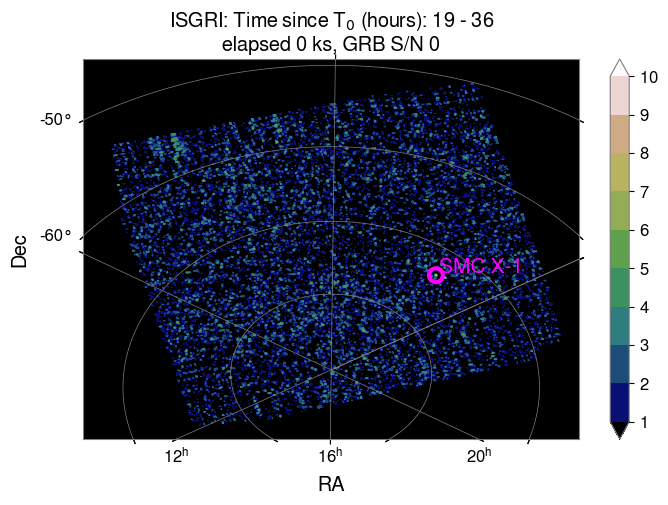

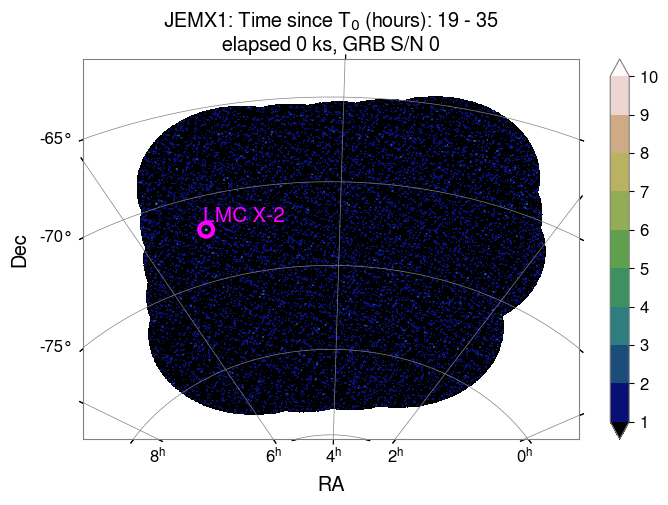

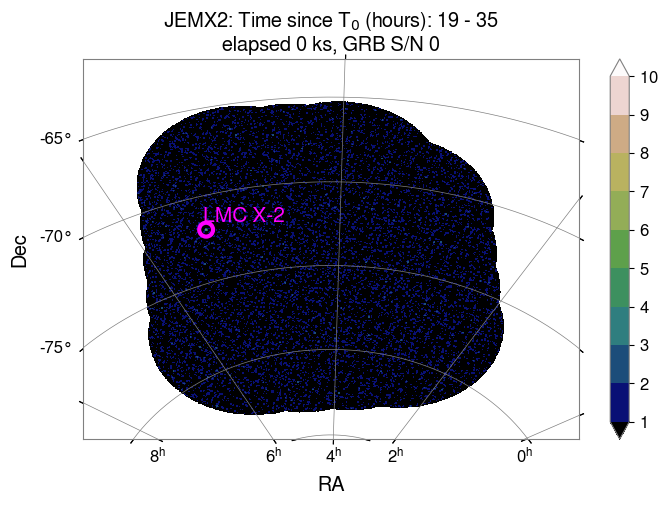

In [15]:
fns = []

for name, image in source_images.items():
    if image:
        h = image.mosaic_image_0_mosaic.data_unit[4].header
        t = image.dispatcher_catalog_1.table        
        m = SkyCoord(t['ra'], t['dec']).separation(src_coord).arcmin <10

        try:
            snr = t[m]['significance'][0]
        except:
            snr = 0

        t = Time(h['TSTART'] + 51544, format='mjd').isot
        im = oda_api.plot_tools.OdaImage(image)
        fns.append(im.write_fits(f'{name}_{focus_obs_name}_'))
        im.show(sliders=False)
        plt.title(f"{name.upper()}: Time since T$_0$ (hours): {(h['TSTART'] - T0_ijd)*24:.2g} - {(h['TSTOP'] - T0_ijd)*24:.2g}\n"
                  f"elapsed {int(h['TSTOP'] - h['TSTART'])*24*3.6:.3g} ks, GRB S/N {snr:.3g}")

In [16]:
# ! pip install pymosaic-fits
import mosaic
import importlib
importlib.reload(mosaic)
mosa = mosaic.FITsMosaic()

from astropy.io import fits

tag = focus_obs_name

for ins in 'jemx1', 'jemx2': #, 'isgri':
    f = fits.open(f"{ins}_{tag}_mosaic.fits")

    new_hdus = [fits.PrimaryHDU()]

    for i in f[2:-1]:

        for k, v in dict(i.header).items():
            if str(v).strip() == 'Real':
                print('patching', k)
                i.header[k] = 1000

        if i.header.get('IMATYPE', '') == 'RECONSTRUCTED':
            i.header['IMATYPE'] = 'INTENSITY'

        i.header['TELAPSE'] = 1000
        i.header['TFIRST'] = 0
        i.header['TLAST'] = 1000
        i.header['E_MIN'] = 3.04
        i.header['E_MAX'] = 29.84
        print(i.header.get('IMATYPE', '??'))
        new_hdus.append(i)
        
        
    fits.HDUList(new_hdus).writeto(f"{ins}_{tag}_mosaic_mod.fits", overwrite=True)
    mosa.add(fits.open(f"{ins}_{tag}_mosaic_mod.fits"))

mosa.writeto(f'jemxX_{tag}_mosaic.fits')


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


INFO:root:first mosaic


patching TELAPSE
INTENSITY
patching TELAPSE
VARIANCE
patching TELAPSE
SIGNIFICANCE
patching TELAPSE
EXPOSURE
patching TELAPSE
INTENSITY
patching TELAPSE
VARIANCE
patching TELAPSE
SIGNIFICANCE
patching TELAPSE
EXPOSURE


INFO:root:adding mosaic


In [17]:
cat = source_images['jemx1'].dispatcher_catalog_1

toremove = []
for i, r in enumerate(cat.table.iterrows()):
    print(r)
    if r[1].startswith('NEW_') or r[1].startswith('GRB') or r[1].startswith('SGR'):
        toremove.append(i)        

cat.table.add_row(
{
    'src_names': source_name,
    'ra': src_coord.ra.deg,
    'dec': src_coord.dec.deg,
    # 'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})

# sgr = SkyCoord.from_name('SGR 1935+2154')
# cat.table.add_row(
# {
#     'src_names': 'SGR 1935+2154',
#     'ra': sgr.ra.deg,
#     'dec': sgr.dec.deg,
#     'ISGRI_FLAG': 1,
#     'FLAG': 1,
#     'ERR_RAD': 0.05,    
# })


cat.table.remove_rows(toremove)

cat.table

(0, 'LMC X-2', 12.767135620117188, 80.1048583984375, -71.96945190429688, 0, 0.05000000074505806)


meta_ID,src_names,significance,ra,dec,FLAG,ERR_RAD
,,,deg,deg,,
int64,str11,float64,float64,float64,int64,float64
0,LMC X-2,12.767135620117188,80.1048583984375,-71.96945190429688,0,0.05000000074505806
0,GRB 230307A,0.0,60.819,-75.379,1,0.05


In [18]:
cat.table

meta_ID,src_names,significance,ra,dec,FLAG,ERR_RAD
,,,deg,deg,,
int64,str11,float64,float64,float64,int64,float64
0,LMC X-2,12.767135620117188,80.1048583984375,-71.96945190429688,0,0.05000000074505806
0,GRB 230307A,0.0,60.819,-75.379,1,0.05


In [19]:
from astropy.table import Table

m_source = [not s.startswith('NEW') for s in cat.table['src_names']]
cat.table = Table(cat.table[m_source])

cat.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[0, 0], ["LMC X-2", "GRB 230307A"], [12.767135620117188, 0.0], [80.1048583984375, 60.819], [-71.96945190429688, -75.379], [0, 1], [0.05000000074505806, 0.05]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U11"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["FLAG", "<i8"], ["ERR_RAD", "<f8"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

In [20]:

# from ddpaper.draftdata import DraftData

with obs_draft_data as dd:
    dd['obs'] = dict(
    )


In [21]:
import time


source_products = {}

while len(source_products) == 0 or None in list(source_products.values()):
    for product in [
            "isgri_lc",
            "isgri_spectrum",
            "isgri_image",
            "isgrihe_image",
            "jemx1_lc",
            "jemx1_spectrum",
            "jemx1_image",
            "jemx2_lc",
            "jemx2_spectrum",
            "jemx2_image",
        ]:
        disp.wait = False
        
        if 'jemx' in product:
            e1, e2 = 4, 30
        else:
            e1, e2 = 28, 80
        
        jnum = 1
        product_pass = product

        if 'jemx1' in product:
            jnum=1
            product_pass = product.replace("jemx1_", "jemx_")
        elif 'jemx2' in product:
            jnum=2
            product_pass = product.replace("jemx2_", "jemx_")
        elif 'isgrihe' in product:
            e1, e2 = 80, 200
            product_pass = product.replace("isgrihe_", "isgri_")
        
        source_products[product] = disp.get_product(
            instrument=product_pass.split("_")[0],
            product=product_pass,
            osa_version="OSA11.2",
            scw_list=scw_list,
            token = oda_api.token.discover_token(),
            E1_keV=e1,
            E2_keV=e2,
            jemx_num=jnum,
            selected_catalog=cat.get_api_dictionary(),
            integral_data_rights="all-private",
        )
    time.sleep(5)

found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1265: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'time_bin', 'time_bin_format']
----------------------------------------------------------------------------

  warnings.warn(msg)
trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_efd035da3a326c57.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_efd035da3a326c57.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_efd035da3a326c57.json.gz in 0.00 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_efd035da3a326c57.json.gz in 0.00 seconds


session: BTL1A7O31UET8AD3 job: 55fe6596197449cb


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: 55fe6596197449cb



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 55fe6596197449cb


INFO:oda_api.api.dispatcherapi:... assigned job id: 55fe6596197449cb


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1265: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV']
----------------------------------------------------------------------------

  warnings.warn(msg)
trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4d948519e6c4ec29.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4d948519e6c4ec29.json.gz


Please note that argument jemx_num is not used


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4d948519e6c4ec29.json.gz in 0.22 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4d948519e6c4ec29.json.gz in 0.22 seconds


session: BTL1A7O31UET8AD3 job: ccfbfc0f94cc85ef


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: ccfbfc0f94cc85ef



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: ccfbfc0f94cc85ef


INFO:oda_api.api.dispatcherapi:... assigned job id: ccfbfc0f94cc85ef


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1265: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
----------------------------------------------------------------------------

  warnings.warn(msg)
trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_5ddd2a71cf837082.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_5ddd2a71cf837082.json.gz


Please note that argument jemx_num is not used


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_5ddd2a71cf837082.json.gz in 0.09 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_5ddd2a71cf837082.json.gz in 0.09 seconds


session: BTL1A7O31UET8AD3 job: 0866621fc447f891


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: 0866621fc447f891



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 0866621fc447f891


INFO:oda_api.api.dispatcherapi:... assigned job id: 0866621fc447f891


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1265: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
----------------------------------------------------------------------------

  warnings.warn(msg)
trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_ed6ef0bc38fed805.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_ed6ef0bc38fed805.json.gz


Please note that argument jemx_num is not used


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_ed6ef0bc38fed805.json.gz in 0.10 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_ed6ef0bc38fed805.json.gz in 0.10 seconds


session: BTL1A7O31UET8AD3 job: 33d45b768559ee5a


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: 33d45b768559ee5a



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 33d45b768559ee5a


INFO:oda_api.api.dispatcherapi:... assigned job id: 33d45b768559ee5a


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1766e765931d7a1f.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1766e765931d7a1f.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1766e765931d7a1f.json.gz in 0.00 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_1766e765931d7a1f.json.gz in 0.00 seconds


session: BTL1A7O31UET8AD3 job: de38400e273a4f7e


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: de38400e273a4f7e



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


Please note that argument jemx_num is not used


... assigned job id: de38400e273a4f7e


INFO:oda_api.api.dispatcherapi:... assigned job id: de38400e273a4f7e


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_21f3f5edc1d84430.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_21f3f5edc1d84430.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_21f3f5edc1d84430.json.gz in 0.01 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_21f3f5edc1d84430.json.gz in 0.01 seconds


session: BTL1A7O31UET8AD3 job: be09cad604e14f1f


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: be09cad604e14f1f



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: be09cad604e14f1f


INFO:oda_api.api.dispatcherapi:... assigned job id: be09cad604e14f1f


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4c3215126447e0eb.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4c3215126447e0eb.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4c3215126447e0eb.json.gz in 0.44 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_4c3215126447e0eb.json.gz in 0.44 seconds


session: BTL1A7O31UET8AD3 job: dda739326fae2867


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: dda739326fae2867



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: dda739326fae2867


INFO:oda_api.api.dispatcherapi:... assigned job id: dda739326fae2867


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_69f14487e03ab16d.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_69f14487e03ab16d.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_69f14487e03ab16d.json.gz in 0.00 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_69f14487e03ab16d.json.gz in 0.00 seconds


session: BTL1A7O31UET8AD3 job: 6d471bbcbf327926


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: 6d471bbcbf327926



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 6d471bbcbf327926


INFO:oda_api.api.dispatcherapi:... assigned job id: 6d471bbcbf327926


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_829a35a2f0cde1b6.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_829a35a2f0cde1b6.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_829a35a2f0cde1b6.json.gz in 0.01 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_829a35a2f0cde1b6.json.gz in 0.01 seconds


session: BTL1A7O31UET8AD3 job: f5d39695bf87604b


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: f5d39695bf87604b



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: f5d39695bf87604b


INFO:oda_api.api.dispatcherapi:... assigned job id: f5d39695bf87604b


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_55cb40d65e564d60.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_55cb40d65e564d60.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_55cb40d65e564d60.json.gz in 0.43 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_55cb40d65e564d60.json.gz in 0.43 seconds


session: BTL1A7O31UET8AD3 job: 68e5288a634d17f2


INFO:oda_api.api:session: BTL1A7O31UET8AD3 job: 68e5288a634d17f2



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 68e5288a634d17f2


INFO:oda_api.api.dispatcherapi:... assigned job id: 68e5288a634d17f2


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


In [22]:
source_products

{'isgri_lc': <oda_api.api.DataCollection at 0x7fd5c71f0490>,
 'isgri_spectrum': <oda_api.api.DataCollection at 0x7fd5c58a9730>,
 'isgri_image': <oda_api.api.DataCollection at 0x7fd5c7275850>,
 'isgrihe_image': <oda_api.api.DataCollection at 0x7fd5c727e970>,
 'jemx1_lc': <oda_api.api.DataCollection at 0x7fd5c7236490>,
 'jemx1_spectrum': <oda_api.api.DataCollection at 0x7fd5c5947b80>,
 'jemx1_image': <oda_api.api.DataCollection at 0x7fd5c561db50>,
 'jemx2_lc': <oda_api.api.DataCollection at 0x7fd5c55edb50>,
 'jemx2_spectrum': <oda_api.api.DataCollection at 0x7fd5c56dd520>,
 'jemx2_image': <oda_api.api.DataCollection at 0x7fd5c56dd8b0>}

In [23]:
d = source_products['jemx1_image']
d.dispatcher_catalog_1.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[], [], [], [], [], [], []], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<f8"], ["src_names", "<f8"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["FLAG", "<f8"], ["ERR_RAD", "<f8"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


total jemx1 p: <oda_api.api.DataCollection object at 0x7fd5c561db50> [<oda_api.data_products.NumpyDataUnit object at 0x7fd5c718f190>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c718f6d0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c718fac0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c718f880>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c718ff70>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c55ed8e0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c55ed040>] ['261400520010.000', '261400530010.000', '261400540010.000', '261400550010.000', '261400560010.000', '261400570010.000', '261400580010.000', '261400590010.000', '261400600010.000', '261400610010.000', '261400620010.000', '261400630010.000', '261400640010.000', '261400650010.000', '261400660010.000', '261400670010.000', '261400680010.000', '261400690010.000', '261400700010.000', '261400710010.000', '261400720010.000', '261400730010.000', '261400740010.000', '261400750010.000', '

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:89: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/astropy/table/column.py:347: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


no GRB here!
total jemx2 p: <oda_api.api.DataCollection object at 0x7fd5c56dd8b0> [<oda_api.data_products.NumpyDataUnit object at 0x7fd5c5815880>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5815a90>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5815a00>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5815910>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5815a30>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c58159a0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5815a60>] ['261400520010.000', '261400530010.000', '261400540010.000', '261400550010.000', '261400560010.000', '261400570010.000', '261400580010.000', '261400590010.000', '261400600010.000', '261400610010.000', '261400620010.000', '261400630010.000', '261400640010.000', '261400650010.000', '261400660010.000', '261400670010.000', '261400680010.000', '261400690010.000', '261400700010.000', '261400710010.000', '261400720010.000', '261400730010.000', '261400740010.000', '2614007

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:89: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Set MJD-OBS to 60011.441319 from DATE-OBS.
Set MJD-END to 60012.172581 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 60011.441319 from DATE-OBS.
Set MJD-END to 60012.172581 from DATE-END'.


no GRB here!
total isgri p: <oda_api.api.DataCollection object at 0x7fd5c7275850> [<oda_api.data_products.NumpyDataUnit object at 0x7fd5c72027c0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c7202250>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5947f70>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5947370>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c5947c70>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c7202eb0>] ['261400520010.000', '261400530010.000', '261400540010.000', '261400550010.000', '261400560010.000', '261400570010.000', '261400580010.000', '261400590010.000', '261400600010.000', '261400610010.000', '261400620010.000', '261400630010.000', '261400640010.000', '261400650010.000', '261400660010.000', '261400670010.000', '261400680010.000', '261400690010.000', '261400700010.000', '261400710010.000', '261400720010.000', '261400730010.000', '261400740010.000', '261400750010.000', '261400760010.000']


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:89: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Set MJD-OBS to 60011.441319 from DATE-OBS.
Set MJD-END to 60012.172581 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 60011.441319 from DATE-OBS.
Set MJD-END to 60012.172581 from DATE-END'.


no GRB here!
total isgrihe p: <oda_api.api.DataCollection object at 0x7fd5c727e970> [<oda_api.data_products.NumpyDataUnit object at 0x7fd5c81328e0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c81329d0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c7290be0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c72909d0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c884cdc0>, <oda_api.data_products.NumpyDataUnit object at 0x7fd5c72c1040>] ['261400520010.000', '261400530010.000', '261400540010.000', '261400550010.000', '261400560010.000', '261400570010.000', '261400580010.000', '261400590010.000', '261400600010.000', '261400610010.000', '261400620010.000', '261400630010.000', '261400640010.000', '261400650010.000', '261400660010.000', '261400670010.000', '261400680010.000', '261400690010.000', '261400700010.000', '261400710010.000', '261400720010.000', '261400730010.000', '261400740010.000', '261400750010.000', '261400760010.000']


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:89: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/astropy/table/column.py:347: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


no GRB here!


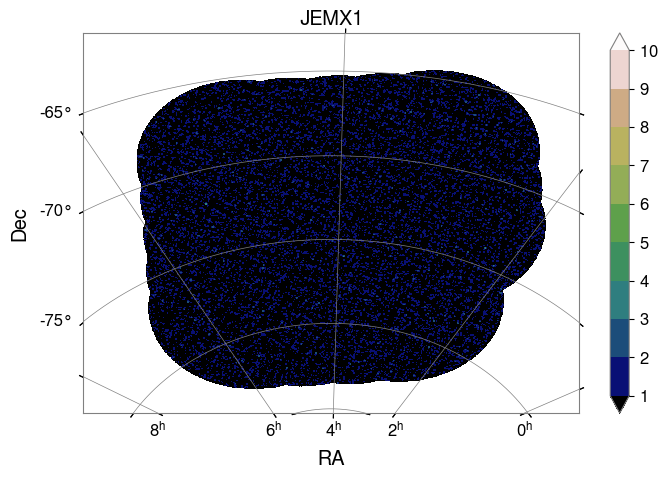

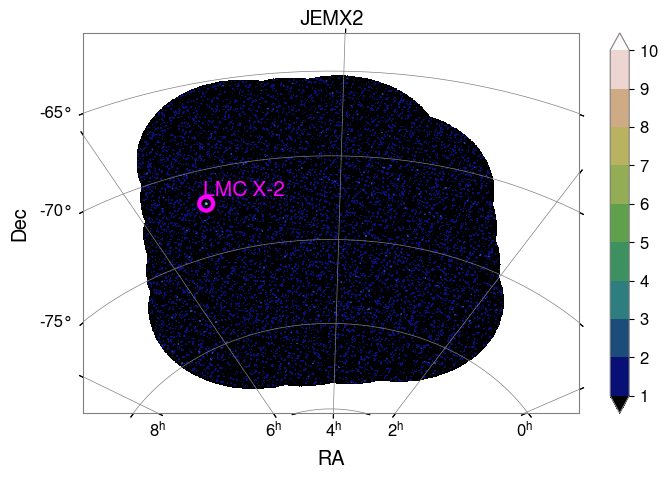

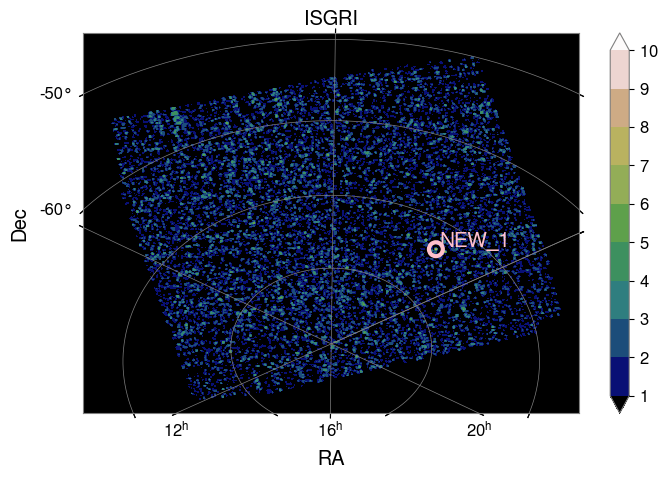

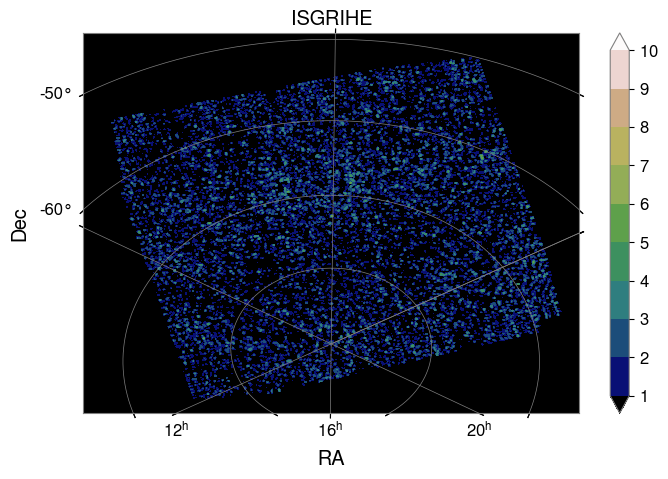

In [24]:
for instrument in 'jemx1', 'jemx2', 'isgri', 'isgrihe':
    p = source_products[instrument + '_image']
    print(focus_obs_name, instrument, "p:", p, p.mosaic_image_0_mosaic.data_unit, scw_list)

    oda_api.plot_tools.OdaImage(p).show(sliders=False) #, header="JEM-X")


    fns.append(oda_api.plot_tools.OdaImage(p).write_fits(instrument + "_"))

    name = instrument.upper() #.replace('JEMX', 'JEM-X')
     
    plt.title(name)
    plt.savefig(f"figs/{instrument}.png")

    with obs_draft_data as dd:
        try:
            dd[instrument] = {'snr': float(p.dispatcher_catalog_1.table[p.dispatcher_catalog_1.table['src_names'] == "GRB221009A"]['significance'][0])}
        except IndexError:
            print("no GRB here!")
        


In [25]:
# TODO: use bat limit https://gcn.gsfc.nasa.gov/gcn3/33431.gcn3

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:421: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


fn: figs/lc_jemx1_grb230307a.pdf


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:421: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


fn: figs/lc_jemx2_grb230307a.pdf


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:421: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


fn: figs/lc_isgri_grb230307a.pdf


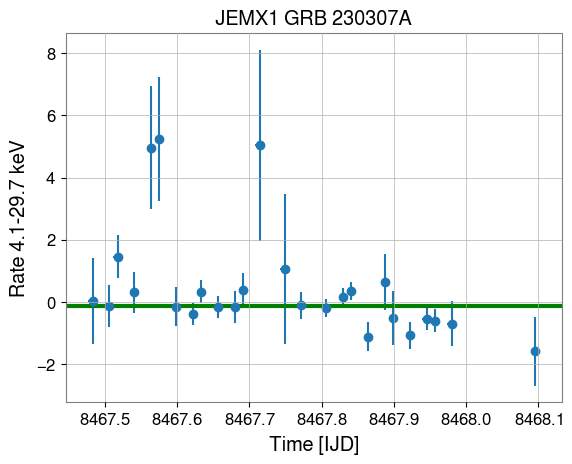

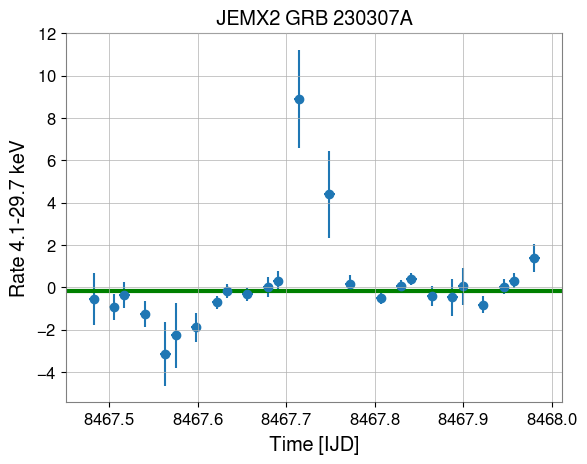

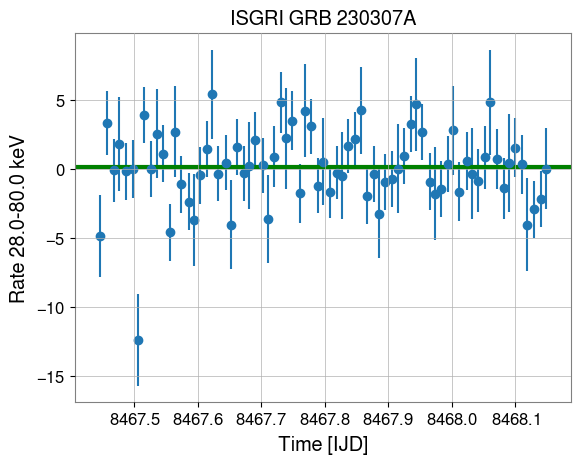

In [26]:
import importlib
import re

importlib.reload(oda_api.plot_tools)

for name in [source_name]: #, 'SGR 1935+2154':
    name_stub = re.sub("[^0-9a-zA-Z]", "", name).lower()

    for instrument in 'jemx1', 'jemx2', 'isgri':
        d = source_products[instrument + '_lc']
        fns.append(oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).write_fits(name))
        oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).show(in_source_name=name)
        plt.title(instrument.upper() + " " + name)
        fn = f"figs/lc_{instrument}_{name_stub}.pdf"
        print("fn:", fn)
        plt.savefig(fn)


In [27]:
for instrument in 'jemx1', 'jemx2', 'isgri':
    p = source_products[instrument + '_spectrum']
    fns.append(oda_api.plot_tools.OdaSpectrum(source_products[instrument + '_spectrum']).write_fits(source_name, file_suffix="_" + focus_obs_name))
    fns.append(fns[-1][0].replace("spectrum", "rmf"))
    fns.append(fns[-2][0].replace("spectrum", "arf"))

    print(fns[-3:])
    
    spec = getattr(p, [l['prod_name'] for l in p.as_list() if l['meta_data:']['src_name'] == source_name][0])
    
    with obs_draft_data as dd:
        if instrument not in dd:
            dd[instrument] = {}
        dd[instrument]['exposure_s'] = spec.data_unit[1].header['EXPOSURE']

Saving spectrum ./JMX1_spectrum_GRB_230307A_total.fits with rmf ./JMX1_rmf_GRB_230307A_total.fits and arf ./JMX1_arf_GRB_230307A_total.fits


INFO:oda_api.plot_tools.odaspectrum:Saving spectrum ./JMX1_spectrum_GRB_230307A_total.fits with rmf ./JMX1_rmf_GRB_230307A_total.fits and arf ./JMX1_arf_GRB_230307A_total.fits


Saving spectrum ./JMX2_spectrum_GRB_230307A_total.fits with rmf ./JMX2_rmf_GRB_230307A_total.fits and arf ./JMX2_arf_GRB_230307A_total.fits


INFO:oda_api.plot_tools.odaspectrum:Saving spectrum ./JMX2_spectrum_GRB_230307A_total.fits with rmf ./JMX2_rmf_GRB_230307A_total.fits and arf ./JMX2_arf_GRB_230307A_total.fits


Saving spectrum ./IBIS_spectrum_GRB_230307A_total.fits with rmf ./IBIS_rmf_GRB_230307A_total.fits and arf ./IBIS_arf_GRB_230307A_total.fits


INFO:oda_api.plot_tools.odaspectrum:Saving spectrum ./IBIS_spectrum_GRB_230307A_total.fits with rmf ./IBIS_rmf_GRB_230307A_total.fits and arf ./IBIS_arf_GRB_230307A_total.fits


[('./JMX1_spectrum_GRB_230307A_total.fits', 60011.44212967001, 60012.12333377343, 39202.2609379993), './JMX1_rmf_GRB_230307A_total.fits', './JMX1_arf_GRB_230307A_total.fits']
[('./JMX2_spectrum_GRB_230307A_total.fits', 60011.44212967001, 60012.12333377343, 37026.6960692013), './JMX2_rmf_GRB_230307A_total.fits', './JMX2_arf_GRB_230307A_total.fits']


[('./IBIS_spectrum_GRB_230307A_total.fits', 60011.44212967001, 60012.17339167247, 28172.35293407081), './IBIS_rmf_GRB_230307A_total.fits', './IBIS_arf_GRB_230307A_total.fits']


In [28]:
with obs_draft_data as dd:
    dd['joint_fit'] = dict(
        e1_keV=3,
        e2_keV=80,
        flux_ecs = 4.4263e-10, # ergs/cm^2/s) range (3.0000 - 80.000 keV
        flux_ecs_err_68p = (4.215e-10 - 4.4263e-10, 4.670e-10 - 4.4263e-10),
        slope = 2.15041,
        slope_err_90p = (-0.0712388,0.0841283)
    )

In [29]:
# T0bat = Time('2022-10-09 14:10:17')


# def xrt_decay(t):
#     # #32671
#     offset_s = ((T0bat.mjd - 51544) - T0_ijd)*24*3600
#     slopes = """Alpha_1 : 2.6 (+0.4, -0.7)
#     Tbreak_1: 177.4 (+2.0, -9.6)
#     Alpha_2 : 0.144 (+0.022, -0.026)
#     Tbreak_2: 610 (+84, -78)
#     Alpha_3 : 0.31 (+0.04, -0.03)
#     Tbreak_3: 4060 [+0.23, -0.19])
#     Alpha_4 : 1.357 (+/-0.010)"""

#     slopes =  {s.split(":")[0].strip(): float(s.split(":")[1].split()[0].strip()) for s in slopes.split("\n")}

#     for k in slopes:
#         if k.startswith('Tbr'):
#             slopes[k] += offset_s

#     r = t**(-slopes['Alpha_1'])

#     m = t > slopes['Tbreak_1'] 
#     rn1 = slopes['Tbreak_1']**(-slopes['Alpha_1']) / slopes['Tbreak_1']**(-slopes['Alpha_2'])
#     r[m] = t[m]**(-slopes['Alpha_2']) * rn1

#     m = t > slopes['Tbreak_2']
#     rn2 = slopes['Tbreak_2']**(-slopes['Alpha_2']) / slopes['Tbreak_2']**(-slopes['Alpha_3']) 
#     r[m] = t[m]**(-slopes['Alpha_3']) * rn1 * rn2


#     m = t > slopes['Tbreak_3']
#     rn3 = slopes['Tbreak_3']**(-slopes['Alpha_3']) / slopes['Tbreak_3']**(-slopes['Alpha_4']) 
#     r[m] = t[m]**(-slopes['Alpha_4']) * rn1 * rn2 * rn3
    
#     return r


# t = np.logspace(0,4)

# plt.figure()

# plt.plot(
#     t,
#     xrt_decay(t)
# )

# plt.loglog()


(0.7, 1.6)

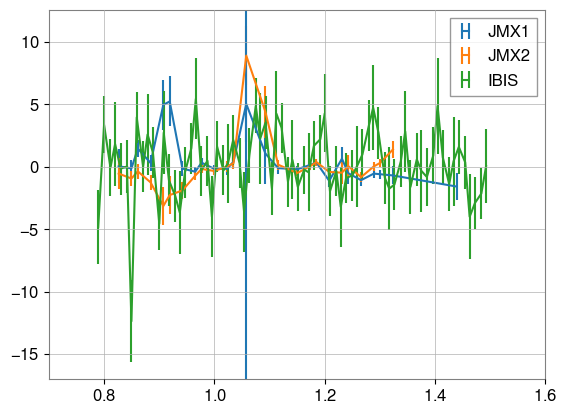

In [30]:
source_name_slug = source_name.replace(" ", "_")

plt.figure()

d_j1 = fits.open(f"JMX1_lc_{source_name_slug}.fits")[1].data
d_j2 = fits.open(f"JMX2_lc_{source_name_slug}.fits")[1].data
d_i = fits.open(f"IBIS_lc_{source_name_slug}.fits")[1].data

t_peak = d_j2[(d_j2['RATE']/ d_j2['ERROR']).argmax()]['TIME']

for n, d in [("JMX1", d_j1), 
          ("JMX2", d_j2), 
          ("IBIS", d_i)]:
    
    plt.errorbar(d['TIME'] - T0_ijd, d['RATE'],d['ERROR'], label=n)

    m = d['TIME'] < 8319.5

    # plt.errorbar(
    #     np.mean(d['TIME'][m]) - T0_ijd, 
    #     np.sum(d['RATE'][m])/np.sum(m),
    #     (np.sum(d['ERROR'][m]**2)**0.5/np.sum(m)), lw=3)

    # T = np.logspace(-1, 1, 60)
    # Tc = (T[1:] + T[:-1])/2.
    # dT = (T[1:] - T[:-1])/2.

    # plt.errorbar(
    #     Tc, 
    #     rebin_in_bins(d['TIME'] - T0_ijd, d['RATE'], T),
    #     rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x)),
    #     xerr=dT,
    #     ls="",
    #     lw=3)

plt.axvline(t_peak - T0_ijd)

plt.legend()
plt.xlim([0.7,1.6])
# plt.ylim([0,5])

In [31]:
peak_scw = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/IJD/{t_peak}/SCWID").text
peak_scw

'261400620010'

In [32]:
# 4, 30

disp.wait = True
peak_image = disp.get_product(
    instrument="jemx",
    product="jemx_image",
    E1_keV=4,
    E2_keV=30,
    jemx_num=2,
    integral_data_rights="all-private",
    scw_list=[peak_scw+".000"],
    token=oda_api.token.discover_token()
)

oda_api.plot_tools.OdaImage(peak_image).write_fits()

found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1678639261,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 77.7 h


INFO:oda_api.token:token expires in 77.7 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b48b97c7b2b9b03a.json.gz


INFO:oda_api.api:trying to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b48b97c7b2b9b03a.json.gz


managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b48b97c7b2b9b03a.json.gz in 0.09 seconds


INFO:oda_api.api:managed to load result from /home/savchenk/.cache/oda-api/cache/oda_api_data_collection_b48b97c7b2b9b03a.json.gz in 0.09 seconds


session: 7TG9JFYIJ8IJG3M3 job: 635626a206c5cf4f


INFO:oda_api.api:session: 7TG9JFYIJ8IJG3M3 job: 635626a206c5cf4f



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 635626a206c5cf4f


INFO:oda_api.api.dispatcherapi:... assigned job id: 635626a206c5cf4f


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


query complete: terminating


INFO:oda_api.api.dispatcherapi:query complete: terminating


'mosaic.fits'

[]

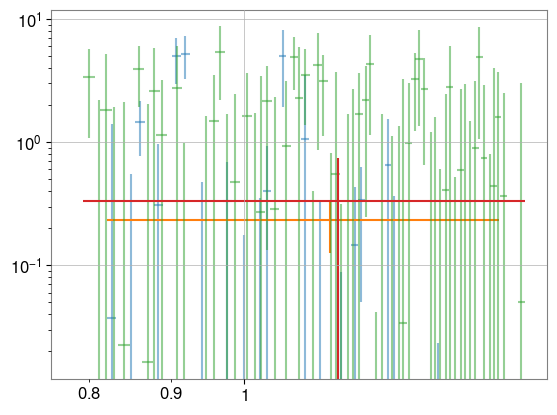

In [33]:

rebinned_lc_by_name = {}


for t, dt, r, re, f, n, T in [
    # (d_j1['TIME'], d_j1['TIMEDEL']/2, (d_j1['RATE'] + d_j2['RATE'])/2, (d_j1['ERROR']**2 + d_j1['ERROR']**2)**0.5/2, 1, 'JEMX1+2', np.logspace(-0.2, 1, 35)),
    # (d_j1['TIME'], d_j1['TIMEDEL']/2, d_j1['RATE'], d_j1['ERROR'], 1, 'JEMX1', np.logspace(-1, 1, 10000)),
    (d_j1['TIME'], d_j1['TIMEDEL']/2, d_j1['RATE'], d_j1['ERROR'], 1, 'JEMX1', np.logspace(-0.1, 1, 4)),
    # (d_j2['TIME'], d_j2['TIMEDEL']/2, d_j2['RATE'], d_j2['ERROR'], 1, 'JEMX2', np.logspace(-0.3, 1, 40)),
    (d_i['TIME'], d_i['TIMEDEL'],d_i['RATE'], d_i['ERROR'], 0.01, 'ISGRI', np.logspace(-0.1, 1, 4)),
]:    
    m = r < 6 # noisy scw?
    m &= re < 4 # noisy scw?
    m &= dt > 0
    t = t - T0_ijd

    plt.errorbar(t[m], r[m], re[m], xerr=dt[m], alpha=0.5, ls="")

    Tc, dT, X, dX = rebin_bins_in_bins(t[m], dt[m], r[m], re[m], T)

    
    # plt.errorbar(t, r,re,         # xerr=d['TIMEDEL']/2, 
    #     ls="", label=n, alpha=0.2)

    plt.errorbar(
        Tc,
        X,
        dX,
        # rebin_in_bins(t, re, T, agg=lambda x:(np.sum(x**2))**0.5/len(x)),
        xerr=dT,
        ls="", 
        label=n)

    rebinned_lc_by_name[n] = {
        'Tc': Tc,
        'X': X,
        'dX': dX,
        'dT': dT,
    }


# plt.semilogx()
plt.loglog()
# plt.xlim([5e-1, 12])
# plt.xlim([0.8, 1.5])
# plt.ylim([-5, 10])

# rebin_in_bins(t, r, T, agg=np.mean)

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/gwpy/plot/axes.py:78: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  return func(self, **kw)


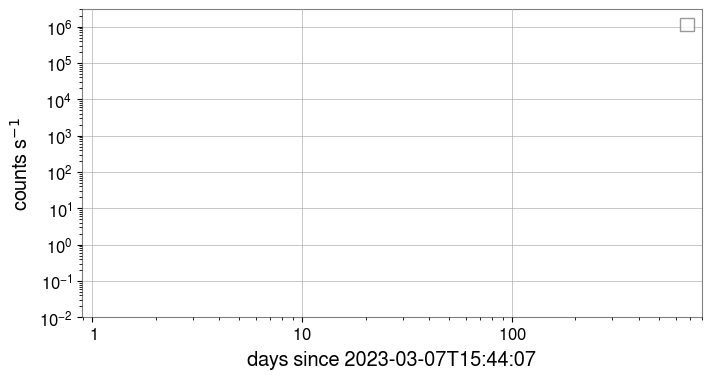

In [34]:
from statistics import mode

plt.figure(figsize=(8,4))


plt.xlabel(f"days since {T0_isot}")

# plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
# plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)


if False:
    from scipy.optimize import minimize

    # minimize()l
    t_model = lambda t, N, slope: N*t**slope
    slope = -1.3
    t_model_noslope = lambda t, N: N*t**slope_0

    def loss(p):
        if len(p) == 1:
            N, = p
            slope = -1.3
        else:
            N, slope = p
            
        d = np.concatenate([
            (t_model(d_j1['TIME'] - T0_ijd, N, slope) - d_j1['RATE']) / d_j1['ERROR'],
            (t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR']
        ])
        

        m = d**2 < np.percentile(d**2, 95)

        # print(N, slope, (d**2).sum(), d_j1[d.argmax()], d_j1[d.argmin()])
        # plt.plot(d_j1['TIME'], d**2)
        return np.sum(d[m]**2) # + \
            #    np.sum(((t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR'])**2) + \
            #    np.sum(((t_model(d_i['TIME'] - T0_ijd, N, slope) - d_i['RATE']) / d_i['ERROR'])**2)

    slope_fitted = slope
    N_fitted, = minimize(loss, [1]).x
    # N_fitted, slope_fitted = minimize(loss, [N_fitted, slope]).x


    t = np.logspace(-1.5, 1, 100) + 200
    plt.plot(t, t_model(t, N_fitted, slope_fitted), ls="--", label=f'fit to JEM-X and ISGRI light curves, slope={slope_fitted:.3g}, N={N_fitted:.2g}')


xrt_norm = 1e3

# t = np.logspace(np.log10(T0bat.mjd - 51544 - T0_ijd), 1, 100)  
# plt.plot(t, xrt_norm*xrt_decay(t*24*3600)*1e8, label="XRT decay", lw=3, ls="-", c='k', alpha=0.5)

plt.legend()

plt.loglog()

plt.xlim([0, 800])
plt.ylim([1e-2, 3e6])

# plt.xlim([-0., 0.5])
# plt.ylim([-300, 300])


# ax_x_hours = plt.twiny()

# plt.ylabel("erg cm$^{-2}$ s$^{-1}$")
plt.ylabel("counts s$^{-1}$")
plt.savefig("figs/joint_lc.png")
# plt.savefig("grb221009-picture/spiacs-lc.png")

# https://www.swift.ac.uk/burst_analyser/01126853/
# https://gcn.gsfc.nasa.gov/gcn3/32671.gcn3

In [35]:
if False:
    # from statistics import mode

    plt.rc('font', size=16) #controls default text size
    plt.rc('axes', titlesize=16) #fontsize of the title
    plt.rc('axes', labelsize=16) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
    plt.rc('legend', fontsize=16) #fontsize of the legend

    d_j1 = source_products['jemx1_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
    d_j2 = source_products['jemx2_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
    d_i = source_products['isgri_lc'].isgri_lc_3_GRB221009A.data_unit[1].data

    plt.figure(figsize=(12,7))

    tail_change = 670

    m = acslc.t  - T0_ijd > 247/24/3600
    m &= acslc.t  - T0_ijd < tail_change/24/3600

    m_acs_long = acslc.t  - T0_ijd > -200/24/3600
    m_acs_long &= acslc.t  - T0_ijd < 0.1


    c = plt.plot(
        (acslc.t - T0_ijd)[m],
        (acslc.c - bkg)[m]/acs_scale,
        # alpha=0.2,
        label="SPI-ACS",
        lw=3
    )[0].get_color()

    # n = 500
    # c = plt.errorbar(
    #         (rebin(acslc.t[m], n)/n - T0_ijd),
    #         (rebin(acslc.c[m], n)/n - bkg - F((rebin(acslc.t[m], n)/n - T0_ijd)*24, *curve[0]))/acs_scale,
    #         # (rebin(acslc.c, n)/n - bkg - F((rebin(acslc.t, n)/n - T0_ijd)*24, *curve[0]))
    #         (rebin(acslc.c[m], n))**0.5/n/acs_scale
    #     )[0].get_color()

    tail_change = 0.005
    T = np.logspace(np.log10(tail_change), -1.1, 100)
    T = np.logspace(np.log10(tail_change), -1.1, 100)

    # T = np.concatenate([np.linspace(0, tail_change, int(tail_change/(tail_bins[1] - tail_bins[0]))), tail_bins])

    Tc, dT, C, CE = rebin_bins_in_bins(acslc.t - T0_ijd, np.ones_like(acslc.t)*0.05/24/3600/2, acslc.c, acslc.c**0.5, T)

    C = C - bkg - F(Tc*24, *curve[0])
    # c = 'blue'
    c = plt.errorbar(Tc, C/acs_scale, CE/acs_scale, c=c, xerr=dT, ls="", lw=3)[0].get_color()
    plt.step(Tc, C/acs_scale, c=c, where='mid', lw=3)



    # for d, f, n in [
    #     (d_j1, 1, 'JEMX1'),
    #     (d_j2, 1, 'JEMX2'),
    #     # (d_i, 0.01, 'ISGRI'),
    # ]:    
    #     plt.errorbar(
    #         d['TIME'] - T0_ijd, 
    #         f*d['RATE'], 
    #         f*d['ERROR'], 
    #         xerr=d['TIMEDEL']/2, ls="", label=n)



    for n, g in rebinned_lc_by_name.items():
        m = g['X'] / g['dX'] > -10

        if n.lower().startswith('jemx'):
            scale = 0.15/(1e-8/200)
        else:
            scale = 1/(1e-8/200)

        plt.errorbar(
                g['Tc'][m],
                g['X'][m]/scale,
                np.max(np.stack([g['dX'], g['X']*0.2]), axis=0)[m]/scale, # observed jemx systematics included
                xerr=g['dT'][m],
                label=n,
                ls="",
                lw=4.
            )

    font = {'fontname':'serif'}

    plt.loglog()
    plt.xlim([200./24/3600, 3])
    plt.xlabel(f"days since {T0_isot.replace('T', ' ')} (T$_0$)", **font)

    # plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
    # plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)

    np.sum(d['TIMEDEL'])*24*3600


    if False:
        from scipy.optimize import minimize

        # minimize()l
        t_model = lambda t, N, slope: N*t**slope
        slope = -1.3
        t_model_noslope = lambda t, N: N*t**slope_0

        def loss(p):
            if len(p) == 1:
                N, = p
                slope = -1.3
            else:
                N, slope = p
                
            d = np.concatenate([
                (t_model(d_j1['TIME'] - T0_ijd, N, slope) - d_j1['RATE']) / d_j1['ERROR'],
                (t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR']
            ])
            

            m = d**2 < np.percentile(d**2, 95)

            # print(N, slope, (d**2).sum(), d_j1[d.argmax()], d_j1[d.argmin()])
            # plt.plot(d_j1['TIME'], d**2)
            return np.sum(d[m]**2) # + \
                #    np.sum(((t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR'])**2) + \
                #    np.sum(((t_model(d_i['TIME'] - T0_ijd, N, slope) - d_i['RATE']) / d_i['ERROR'])**2)

        slope_fitted = slope
        N_fitted, = minimize(loss, [1]).x
        # N_fitted, slope_fitted = minimize(loss, [N_fitted, slope]).x


        t = np.logspace(-1.5, 1, 100) + 200
        plt.plot(t, t_model(t, N_fitted, slope_fitted), ls="--", label=f'fit to JEM-X and ISGRI light curves, slope={slope_fitted:.3g}, N={N_fitted:.2g}')


    xrt_norm = 1e3

    # t = np.logspace(np.log10(T0bat.mjd - 51544 - T0_ijd), 1, 100)  
    # plt.plot(t, xrt_norm*xrt_decay(t*24*3600)*1e8, label="XRT decay", lw=3, ls="-", c='k', alpha=0.5)

    plt.legend(loc='lower left')
    plt.ylabel("erg cm$^{-2}$ s$^{-1}$")

    plt.xlim([2e-3, 15])
    # plt.ylim([1e-2, 3e6])

    # plt.xlim([-0., 0.5])
    # plt.ylim([-300, 300])


    # ax_x_hours = plt.twiny()

    # plt.rcParams["figure.figsize"] = [7.00, 3.50]
    # plt.rcParams["figure.autolayout"] = True

    im = plt.imread(f'pom/grb-light-{focus_obs_name}.png') # insert local path of the image.
    newax = plt.gcf().add_axes([0.50,0.45,1.0,0.50], anchor='SW', zorder=1)
    newax.imshow(im)
    newax.axis('off')


    im = plt.imread(f'pom/grb-light-r2560.png') # insert local path of the image.
    newax = plt.gcf().add_axes([0.70,0.34,0.9,0.34], anchor='SW', zorder=1)
    newax.imshow(im)
    newax.axis('off')


    plt.savefig("figs/joint_lc.png")
    plt.savefig(f"pom/composite-light-{focus_obs_name}.png")
    # plt.savefig(f"pom/composite-light-multiobs.png")

    # https://www.swift.ac.uk/burst_analyser/01126853/
    # https://gcn.gsfc.nasa.gov/gcn3/32671.gcn3

In [36]:
!ls -lotr jemxX*

-rw-rw-r-- 1 savchenk 15382080 Mär  9 12:01 jemxX_total_mosaic.fits


Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-END format 'UTC_format''.


{'isgri': {'exposure_s': 28172.35293407081}, 'jemx1': {'exposure_s': 39202.2609379993}, 'jemx2': {'exposure_s': 37026.6960692013}, 'joint_fit': {'e1_keV': 3, 'e2_keV': 80, 'flux_ecs': 4.4263e-10, 'flux_ecs_err_68p': (-2.113000000000001e-11, 2.437000000000004e-11), 'slope': 2.15041, 'slope_err_90p': (-0.0712388, 0.0841283)}, 'obs': {}, 'telapse_sum_s': 60160.03523533581, 'telapse_total_s': 63181.03701258078, 'tstart_ijd': 8467.44212967001, 'tstop_ijd': 8468.17339167247}


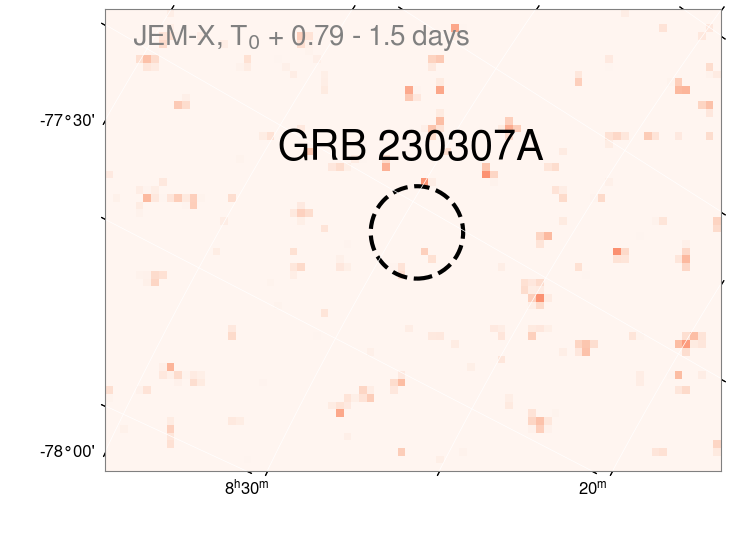

In [37]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

# focus_obs_name = "total_3p"
# focus_obs_name = "r2560"

filename = f'jemxX_{focus_obs_name}_mosaic.fits'
# filename = 'jemxX_mosaic.fits'

hdu = fits.open(filename)[5]
wcs = WCS(hdu.header)

(x, y), = wcs.all_world2pix([[src_coord.ra.deg, src_coord.dec.deg]], 1)
i= int(y)
j= int(x)

scope = 30
scope_w = 40

plt.figure(figsize=(8,6))
plt.subplot(projection=wcs)

cut = hdu.data[i-scope:i+scope, j-scope_w:j+scope_w]
SNR = cut.max() / np.std(cut)

plt.imshow(cut, vmin=1, vmax=4, origin='lower', cmap='Reds')
plt.grid(color='white', ls='solid')
# plt.xlim([src_coord.ra.deg - 1, src_coord.ra.deg + 1])
# plt.ylim([src_coord.dec.deg - 1, src_coord.dec.deg + 1])
# plt.xlabel('RA')
# plt.ylabel('Dec')
plt.xlabel(' ')
plt.ylabel(' ')


# plt.gca().xaxis.set_label_coords(1.2, -20)

# plt.text(src_coord.ra.deg, src_coord.dec.deg, "GRB 221009A")
# plt.text(22, 40, f"GRB 221009A (S/N = {SNR})", size=30)
plt.text(22, 40, source_name, size=30)

ijd2isot = lambda x: Time(x+51544, format='mjd').isot
ijd2dayssince = lambda x:((x-T0_ijd))

with DraftData(focus_obs_name) as dd:
    print(dd)
    plt.text(3, 55, f'JEM-X, T$_0$ + {ijd2dayssince(dd["tstart_ijd"]):.2g} - {ijd2dayssince(dd["tstop_ijd"]):.2g} days', size=20,
            color='grey')
    # plt.title(f'Combined JEM-X image {ijd2dayssince(dd["tstart_ijd"]):.2g} - {ijd2dayssince(dd["tstop_ijd"]):.2g} days since T$_0$')

plt.gca().set_xticklabels([])
plt.gca().set_yticks([])
# plt.gca().add_patch(plt.Circle((40,30), 6, fill=False, lw=3, ls='--'))
plt.gca().add_patch(plt.Circle((40,30.5), 6, fill=False, lw=3, ls='--'))
plt.savefig(f"grb-light-{focus_obs_name}.png")

In [38]:
# from IPython.display import Image

# Image('jemx-p3.png')

In [39]:
with obs_draft_data as dd:
    dd['T0_isot'] = T0_isot
    dd['tstart_isot'] = Time(d_j1['TIME'].min()+51544, format='mjd').isot
    dd['tstart_since_t0'] = d_j1['TIME'].min() - T0_ijd
    dd['tstop_isot'] = Time(d_j1['TIME'].max()+51544, format='mjd').isot
    dd['tstop_since_t0'] = d_j1['TIME'].max() - T0_ijd
    dd['ontime_s'] = np.sum(d_j1['TIMEDEL'])*24*3600

In [40]:
fns

['isgri_total_mosaic.fits',
 'jemx1_total_mosaic.fits',
 'jemx2_total_mosaic.fits',
 'jemx1_mosaic.fits',
 'jemx2_mosaic.fits',
 'isgri_mosaic.fits',
 'isgrihe_mosaic.fits',
 ('./JMX1_lc_GRB_230307A.fits', 60011.47685187285, 60012.10185186878, -1),
 ('./JMX2_lc_GRB_230307A.fits', 60011.47685187285, 60011.98611112804, -1),
 ('./IBIS_lc_GRB_230307A.fits',
  60011.442131388016,
  60012.152749267116,
  282.070260846282),
 ('./JMX1_spectrum_GRB_230307A_total.fits',
  60011.44212967001,
  60012.12333377343,
  39202.2609379993),
 './JMX1_rmf_GRB_230307A_total.fits',
 './JMX1_arf_GRB_230307A_total.fits',
 ('./JMX2_spectrum_GRB_230307A_total.fits',
  60011.44212967001,
  60012.12333377343,
  37026.6960692013),
 './JMX2_rmf_GRB_230307A_total.fits',
 './JMX2_arf_GRB_230307A_total.fits',
 ('./IBIS_spectrum_GRB_230307A_total.fits',
  60011.44212967001,
  60012.17339167247,
  28172.35293407081),
 './IBIS_rmf_GRB_230307A_total.fits',
 './IBIS_arf_GRB_230307A_total.fits']

In [41]:
fits_pack_fn = "fits_files.tar"

import tarfile
with tarfile.open(fits_pack_fn, "w") as tar:
    for fn in fns:
        if isinstance(fn, tuple):
            tar.add(fn[0])
        else:
            tar.add(fn)
        

In [42]:
with tarfile.open(fits_pack_fn) as tar:
    tar.extractall()

In [43]:
dd

{'isgri': {'exposure_s': 28172.35293407081},
 'jemx1': {'exposure_s': 39202.2609379993},
 'jemx2': {'exposure_s': 37026.6960692013},
 'joint_fit': {'e1_keV': 3,
  'e2_keV': 80,
  'flux_ecs': 4.4263e-10,
  'flux_ecs_err_68p': (-2.113000000000001e-11, 2.437000000000004e-11),
  'slope': 2.15041,
  'slope_err_90p': (-0.0712388, 0.0841283)},
 'obs': {},
 'telapse_sum_s': 60160.03523533581,
 'telapse_total_s': 63181.03701258078,
 'tstart_ijd': 8467.44212967001,
 'tstop_ijd': 8468.17339167247,
 'T0_isot': '2023-03-07T15:44:07',
 'tstart_isot': '2023-03-08T11:35:00.002',
 'tstart_since_t0': 0.8262015930413327,
 'tstop_isot': '2023-03-09T02:18:20.002',
 'tstop_since_t0': 1.4396275189683365,
 'ontime_s': 25999.990848}

In [44]:
with DraftData() as dd:
    dd['sc'] = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()

dd['sc']

{'barytime': -0.4673303354027879,
 'bodies': {'earth': {'body_dec': -71.806,
   'body_distance': 0,
   'body_in_sc': [83.48834448353527, -6.700498345197278],
   'body_ra': 18.36500000000001,
   'body_size': 2.5448014617604846,
   'integral_parallax': 57.29577951308232,
   'separation': 143442.0},
  'moon': {'body_dec': -71.806,
   'body_distance': 400109.5334791718,
   'body_in_sc': [87.44742950875049, -178.3169012189572],
   'body_ra': 18.36500000000001,
   'body_size': 0.2719514974236188,
   'integral_parallax': 22.457839201749408,
   'separation': 365957.7901098938},
  'sun': {'body_dec': -71.806,
   'body_distance': 148439221.45988047,
   'body_in_sc': [95.43716201880437, -1.0781436646149416],
   'body_ra': 18.36500000000001,
   'body_size': 0.2684399654556911,
   'integral_parallax': 0.05534794527079955,
   'separation': 148490086.93465504}},
 'd_scx': 74.7077126800183,
 'd_scy': 19.519796494063932,
 'd_scz': 78.16195912994519,
 'dyz_scy': 12.279113239553237,
 'dyz_scz': 77.720886

In [45]:
with obs_draft_data as dd:
    pass

In [46]:
# dd.update(ddpaper.draftdata.dump_notebook_globals("glbs", globals()))

In [47]:
# lc_jemx1_grb221009a = "figs/lc_jemx1_grb221009a.pdf"
# lc_jemx2_grb221009a = "figs/lc_jemx2_grb221009a.pdf"
# lc_isgri_grb221009a = "figs/lc_isgri_grb221009a.pdf"


In [48]:
data = dd
fits_pack = fits_pack_fn

In [49]:

import papermill as pm
import scrapbook as sb
import base64
import json
import hashlib
import os
    
from nb2workflow.nbadapter import denumpyfy
from nb2workflow.json import CustomJSONEncoder


try:
    sb.glue("data",denumpyfy(data))
except Exception as e:
    print("failed to glue data", data)
    print("will glue jsonified")
    sb.glue("data",json.dumps(denumpyfy(data), cls=CustomJSONEncoder))

if isinstance(data,str) and os.path.exists(data):
    variable_name = "data"
    fn = data
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("data_url", url)


try:
    sb.glue("fits_pack",denumpyfy(fits_pack))
except Exception as e:
    print("failed to glue fits_pack", fits_pack)
    print("will glue jsonified")
    sb.glue("fits_pack",json.dumps(denumpyfy(fits_pack), cls=CustomJSONEncoder))

if isinstance(fits_pack,str) and os.path.exists(fits_pack):
    variable_name = "fits_pack"
    fn = fits_pack
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("fits_pack_url", url)



<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?


/tmp/ipykernel_1550579/3375885938.py:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


/tmp/ipykernel_1550579/3375885938.py:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


storing file to URL file:///tmp/nb2w-store/093f39c890fa7566008d79c36e95dddf
